# <전국 광역지자체 카페수와 관광객 수의 상관관계>

광역지자체별로 카페수와 관광객 수의 상관관계를 분석해 본 결과 유의미한 결과가 나오지 않았다.

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## 전국 데이터 활용

### 방문자수

In [2]:
#방문자수
방문객 = pd.read_csv("../data/광역지자체 방문자수_20210813.csv", names=['지역','구분','2018','2019','2020'], skiprows=lambda x: x%6 in [0,1,2,3,5])

In [3]:
방문객

,지역,구분,2018,2019,2020
0,전국,외부방문자(b+c),"2,787,477,829","3,019,812,007","2,481,383,213"
1,서울특별시,외부방문자(b+c),"606,282,720","676,239,448","487,262,130"
2,부산광역시,외부방문자(b+c),"149,628,499","154,956,548","125,665,298"
3,대구광역시,외부방문자(b+c),"105,117,110","107,487,542","86,421,703"
4,인천광역시,외부방문자(b+c),"159,550,161","186,061,142","138,188,309"
5,광주광역시,외부방문자(b+c),"63,837,307","66,038,784","56,735,024"
6,대전광역시,외부방문자(b+c),"82,585,850","83,628,100","69,619,942"
7,울산광역시,외부방문자(b+c),"46,433,222","48,862,667","43,535,032"
8,세종특별자치시,외부방문자(b+c),"23,109,587","25,285,404","23,963,959"
9,경기도,외부방문자(b+c),"591,259,444","664,749,407","551,691,057"


In [4]:
방문자수=방문객[['2019','2020']]
방문자수.index=방문객['지역']
방문자수=방문자수[1:]

In [5]:
for i in range(len(방문자수)):
    #print(방문자수.iloc[i][0])
    방문자수.iloc[i][0] = int(방문자수.iloc[i][0].strip().replace(',', ''))
    방문자수.iloc[i][1] = int(방문자수.iloc[i][1].strip().replace(',', ''))

In [6]:
방문자수 = 방문자수.astype('int64')
#방문자수.info()

## 인구데이터

In [7]:
인구 = pd.read_csv("../data/행정구역_시군구_별__성별_인구수_2019.csv", encoding='cp949', index_col='행정구역(시군구)별',skiprows=1)
인구=인구[1:]
총인구19=인구['총인구수 (명)']

In [8]:
인구 = pd.read_csv("../data/행정구역_시군구_별__성별_인구수_2020.csv", encoding='cp949', index_col='행정구역(시군구)별',skiprows=1)
인구=인구[1:]
총인구20=인구['총인구수 (명)']

## 카페수

In [9]:
광역시도 = ['서울', '부산','대구','인천','광주','대전','울산','세종','경기','강원','충북','충남','전북','전남','경북','경남','제주']

In [10]:
filenames=[]
for x in 광역시도:
    string = "../data/소상공인시장진흥공단_상가(상권)정보_20210630/소상공인시장진흥공단_상가(상권)정보_"+x+"_202106.csv"
    filenames.append(string)

In [11]:
카페수=[]
for i,x in enumerate(광역시도):
    data = pd.read_csv(filenames[i])
    cafe = data[data['상권업종소분류명']=='커피전문점/카페/다방']
    카페수.append(len(cafe))

C:\Users\scarl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
지역별카페수 = pd.DataFrame(카페수, index=인구.index, columns=['카페개수'])

In [13]:
#지역별카페수.info()

## 세가지 데이터 합치기

In [14]:
최종데이터 = pd.concat([지역별카페수, 방문자수, 총인구19, 총인구20], axis=1,join='inner')
최종데이터.columns=['카페개수(21)', '방문자수(19)','방문자수(20)','인구수(19)','인구수(20)']
최종데이터

,카페개수(21),방문자수(19),방문자수(20),인구수(19),인구수(20)
서울특별시,20484,676239448,487262130,9729107,9668465
부산광역시,6091,154956548,125665298,3413841,3391946
대구광역시,5156,107487542,86421703,2438031,2418346
인천광역시,5099,186061142,138188309,2957026,2942828
광주광역시,3069,66038784,56735024,1456468,1450062
대전광역시,3220,83628100,69619942,1474870,1463882
울산광역시,2206,48862667,43535032,1148019,1136017
세종특별자치시,655,25285404,23963959,340575,355831
경기도,24065,664749407,551691057,13239666,13427014
강원도,4474,145612023,131441930,1541502,1542840


In [15]:
최종데이터.corr()

,카페개수(21),방문자수(19),방문자수(20),인구수(19),인구수(20)
카페개수(21),1.000000,0.985994,0.991544,0.992176,0.991177
방문자수(19),0.985994,1.000000,0.994698,0.971230,0.969226
방문자수(20),0.991544,0.994698,1.000000,0.981832,0.980781
인구수(19),0.992176,0.971230,0.981832,1.000000,0.999921
인구수(20),0.991177,0.969226,0.980781,0.999921,1.000000


In [16]:
최종데이터=최종데이터[['카페개수(21)','인구수(20)', '방문자수(20)']]
최종데이터.columns=['카페개수','인구수', '방문자수']

20년이 더 적합 -> 외국인은 카페와 관련이 덜하다.

<AxesSubplot:xlabel='카페개수', ylabel='방문자수'>

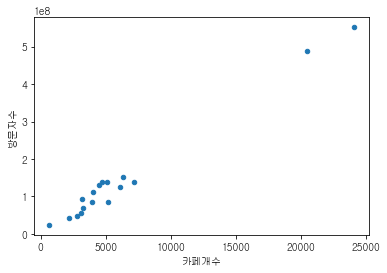

In [17]:
최종데이터.plot.scatter(x='카페개수', y = '방문자수')

<AxesSubplot:title={'center':'heatmap of visitor cafe population'}>

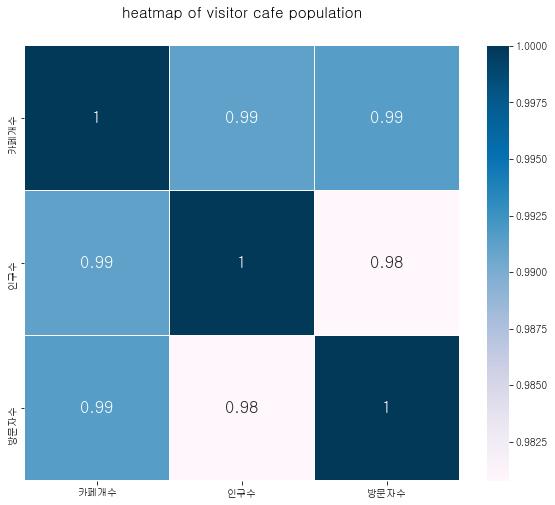

In [18]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("heatmap of visitor cafe population", y = 1.05, size = 15)
sns.heatmap(최종데이터.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})